# **Wine Quality Prediction**
### *Using Logistic Regression, Decision Tree & Random Forest Classifier*

 - **Thành viên** : 
     + 20280071 - Nguyễn Tiến Phong
 
 - **Bộ dữ liệu** : 
     + Bộ dữ liệu được lấy từ Kaggle : https://www.kaggle.com/rajyellow46/wine-quality
     + Thông tin của các loại rượu gồm các biến thể màu đỏ và trắng của rượu vang *Vinho Verde* của Bồ Đào Nha
     
 - **Mục tiêu** : 
     + Xây dựng các mô hình phân loại để tìm kiếm các yếu tố ảnh hưởng đến chất lượng của rượu vang


## 1. Nhập thư viện

In [75]:
# Thư viện phân tích và khám phá dữ liệu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thư viện đào tạo và đánh giá mô hình
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## 2. Đọc tập dữ liệu

### *Đọc dữ liệu*

In [80]:
df = pd.read_csv('D:/Kì 5/Python cho KHDL/Final test/winequality.csv')

In [81]:
df.shape

(6497, 13)

In [82]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [83]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

 - Thông tin thuộc tính :
     - type (white and red)
     - fixed acidity : Độ axit cố định 
     - volatile acidity : Độ bay hơi axit
     - citric acid : Axit citric
     - residual sugar : Đường dư
     - chlorides : Clorua
     - free sulfur dioxide : Lưu huỳnh đioxit tự do
     - total sulfur dioxide : Tổng lượng lưu huỳnh đioxit
     - density : Mật độ
     - pH : Độ pH
     - sulphates : Muối sulfat
     - alcohol : Cồn
     - quality (score between 3 and 9)

### *Thông tin tập dữ liệu*

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### *Thống kê cơ bản*

In [85]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### *Kiểm tra các ô dữ liệu bị mất*

In [87]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

#### *Lấp các ô dữ liệu bị mất*

In [88]:
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [89]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### *Vẽ biểu đồ*

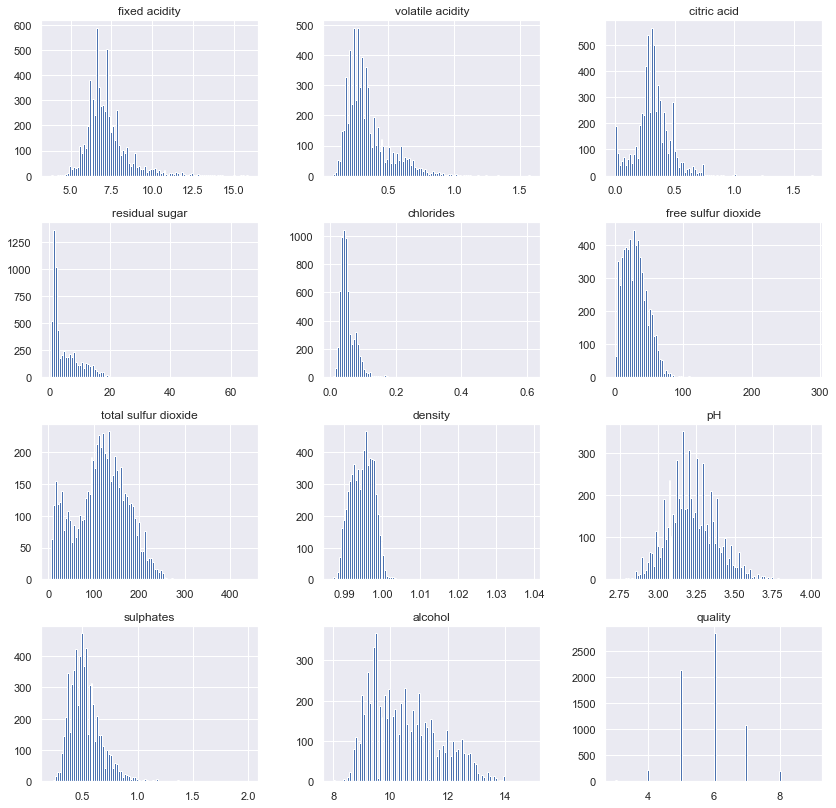

In [90]:
df.hist(bins=100, figsize=(14,14))
plt.show()

## 3. Sự tương quan

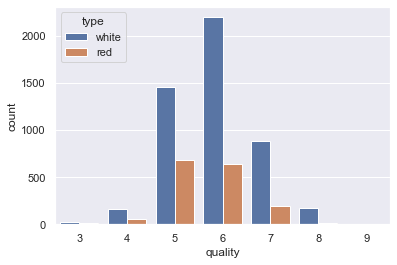

In [91]:
sns.set(style="darkgrid")
sns.countplot(x=df["quality"],hue="type",data=df)
plt.show()

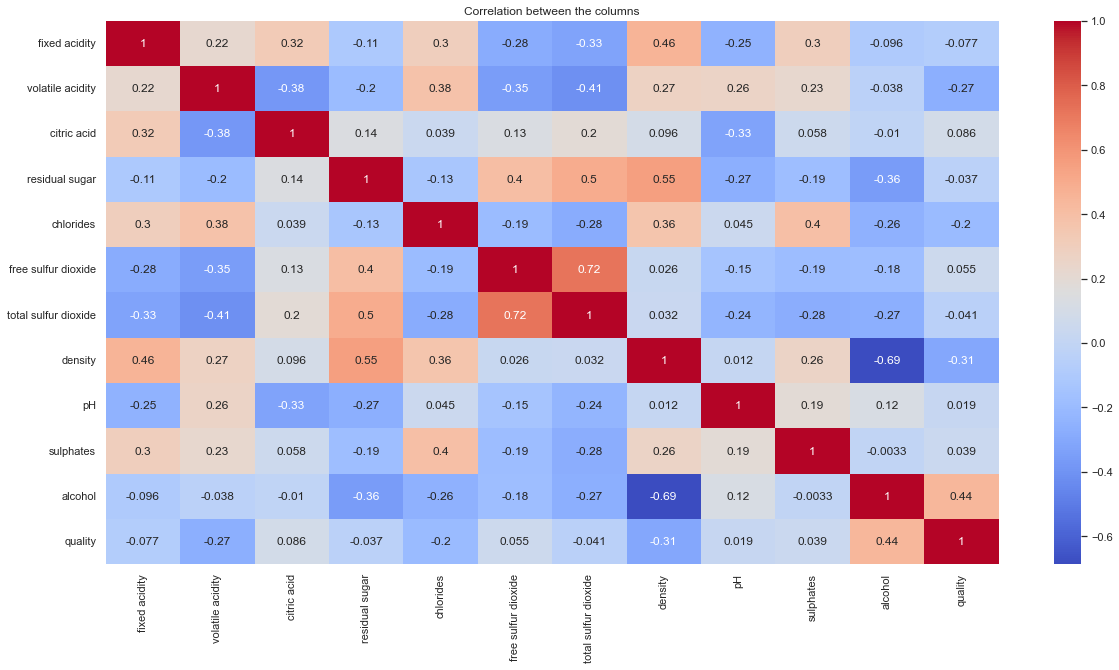

In [92]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between the columns')
plt.show()

## 4. Tiền xử lý dữ liệu

#### *Các đặc tính phù hợp*

In [95]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [96]:
X.shape, y.shape

((6497, 10), (6497,))

### *Chia chất lượng thành 2 mức độ*

In [97]:
y_2 = y.apply(lambda x:1 if x>=7 else 0)
y_2.value_counts()

0    5220
1    1277
Name: quality, dtype: int64

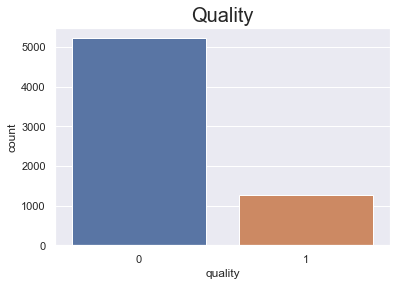

In [98]:
plt.title("Quality",fontsize=20)
sns.countplot(x=y_2)
plt.show()

### *Chia chất lượng thành 3 mức độ*

In [99]:
quality_mapping = { 3 : "Low", 4 : "Low", 5: "Medium", 6 : "Medium", 7 : "Medium", 8 : "High", 9 : "High"}
y_3 = y.map(quality_mapping)

In [100]:
y_3.value_counts()

Medium    6053
Low        246
High       198
Name: quality, dtype: int64

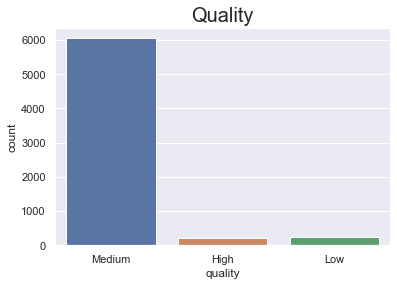

In [101]:
plt.title("Quality",fontsize=20)
sns.countplot(x=y_3)
plt.show()

### *Chia chất lượng thành 7 mức độ*

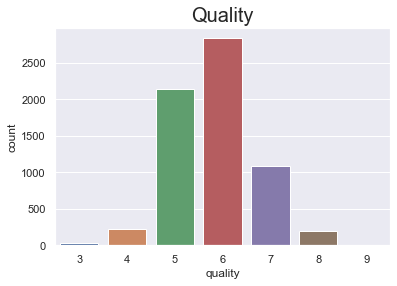

In [102]:
y_7 = y
plt.title("Quality",fontsize=20)
sns.countplot(x=y_7)
plt.show()

### *Cân bằng dữ liệu*

In [103]:
#Cân bằng dữ liệu với 2 mức chất lượng
from imblearn.over_sampling import SMOTE
sm_2 = SMOTE()

X_2b, y_2b = sm_2.fit_resample(X, y_2)

In [104]:
X_2b.shape, y_2b.shape

((10440, 10), (10440,))

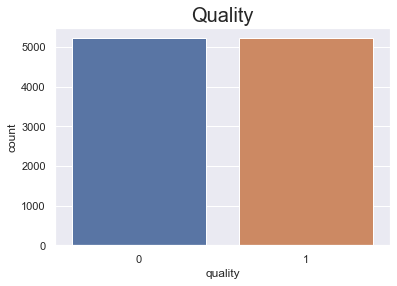

In [105]:
plt.title("Quality",fontsize=20)
sns.countplot(x=y_2b)
plt.show()

In [106]:
#Cân bằng dữ liệu với 3 mức chất lượng
from imblearn.over_sampling import SMOTE
sm_3 = SMOTE()

X_3b, y_3b = sm_3.fit_resample(X, y_3)

In [107]:
X_3b.shape, y_3b.shape

((18159, 10), (18159,))

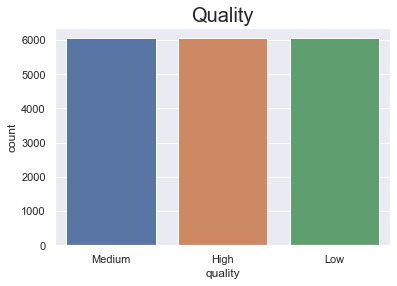

In [108]:
plt.title("Quality",fontsize=20)
sns.countplot(x=y_3b)
plt.show()

In [109]:
#Cân bằng dữ liệu với 3 mức chất lượng
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

sm_7 = SMOTE(k_neighbors=4)

X_7b, y_7b = sm_7.fit_resample(X, y_7)

In [110]:
X_7b.shape, y_7b.shape

((19852, 10), (19852,))

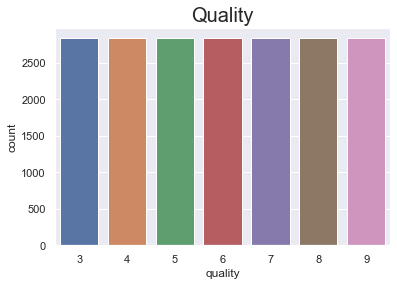

In [111]:
plt.title("Quality",fontsize=20)
sns.countplot(x=y_7b)
plt.show()

### *Tách tập dữ liệu*

### *Tập dữ liệu có 2 mức chất lượng*

In [115]:
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2b, y_2b, train_size=0.8, test_size=0.2, random_state=42)

In [116]:
# Scale dữ liệu
st2 = StandardScaler()
X_2train = st2.fit_transform(X_2train)
X_2test = st2.transform(X_2test)

In [117]:
print("X_train :", X_2train.shape)
print("X_test :", X_2test.shape)
print("y_train :", y_2train.shape)
print("y_test :", X_2test.shape)

X_train : (8352, 10)
X_test : (2088, 10)
y_train : (8352,)
y_test : (2088, 10)


### *Tập dữ liệu có 3 mức chất lượng*

In [118]:
X_3train, X_3test, y_3train, y_3test = train_test_split(X_3b, y_3b, train_size=0.8, test_size=0.2, random_state=42)

In [119]:
# Scale dữ liệu
st3 = StandardScaler()
X_3train = st3.fit_transform(X_3train)
X_3test = st3.transform(X_3test)

In [120]:
print("X_train :", X_3train.shape)
print("X_test :", X_3test.shape)
print("y_train :", y_3train.shape)
print("y_test :", X_3test.shape)

X_train : (14527, 10)
X_test : (3632, 10)
y_train : (14527,)
y_test : (3632, 10)


### *Tập dữ liệu có 7 mức chất lượng*

In [121]:
X_7train, X_7test, y_7train, y_7test = train_test_split(X_7b, y_7b, train_size=0.8, test_size=0.2, random_state=42)

In [122]:
# Scale dữ liệu
st7 = StandardScaler()
X_7train = st7.fit_transform(X_7train)
X_7test = st7.transform(X_7test)

In [123]:
print("X_train :", X_7train.shape)
print("X_test :", X_7test.shape)
print("y_train :", y_7train.shape)
print("y_test :", X_7test.shape)

X_train : (15881, 10)
X_test : (3971, 10)
y_train : (15881,)
y_test : (3971, 10)


## 5. Huấn luyện mô hình và đánh giá

### *Tập dữ liệu có 2 mức chất lượng*

### Logistic Regression (2)

In [124]:
#Khởi tạo model
logreg = LogisticRegression()

#fit với dữ liệu train
logreg.fit(X_2train, y_2train)

#Dự đoán dữ liệu test
logreg_pred = logreg.predict(X_2test)

#Accuracy Score
lr_as = accuracy_score(y_2test, logreg_pred)
print("Accuracy Score:", lr_as * 100)

#F1-Score
lr_f1 = f1_score(y_2test, logreg_pred) 
print("F1 Score:", lr_f1 * 100)

Accuracy Score: 74.66475095785441
F1 Score: 74.98817966903073


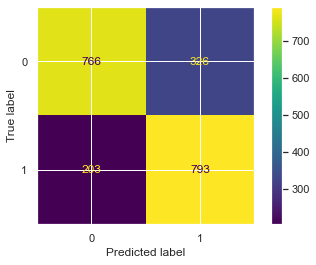

In [125]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_2test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [126]:
print(classification_report(y_2test, logreg_pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1092
           1       0.71      0.80      0.75       996

    accuracy                           0.75      2088
   macro avg       0.75      0.75      0.75      2088
weighted avg       0.75      0.75      0.75      2088



### Decision Tree Classifier (2)

In [127]:
#Khởi tạo model
dtree = DecisionTreeClassifier()

#fit với dữ liệu train
dtree.fit(X_2train, y_2train)

#Dự đoán với dữ liệu
dtree_pred = dtree.predict(X_2test)

#Accuracy Score
dt_as = accuracy_score(dtree_pred, y_2test)
print("Accuracy Score:", dt_as * 100)

#F1 Score
dt_f1 = f1_score(dtree_pred, y_2test)
print("F1 Score:", dt_f1 * 100)

Accuracy Score: 86.01532567049809
F1 Score: 85.7976653696498


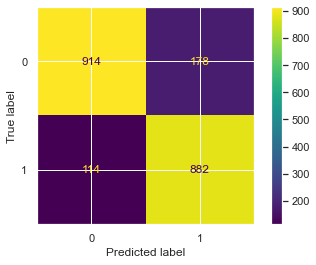

In [128]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_2test, dtree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [129]:
print(classification_report(y_2test, dtree_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1092
           1       0.83      0.89      0.86       996

    accuracy                           0.86      2088
   macro avg       0.86      0.86      0.86      2088
weighted avg       0.86      0.86      0.86      2088



### Random Forest Classifier (2)

In [130]:
#Khởi tạo model
rforest = RandomForestClassifier()

#fit với dữ liệu train
rforest.fit(X_2train, y_2train)

#Dự đoán với dữ liệu test
rforest_pred = rforest.predict(X_2test)

#Accuracy Score
rf_as = accuracy_score(rforest_pred, y_2test)
print("Accuracy Score:", rf_as * 100)

#F1 Score
rf_f1 = f1_score(rforest_pred, y_2test)
print("F1 Score:", rf_f1 * 100)

Accuracy Score: 91.33141762452107
F1 Score: 91.18363370677058


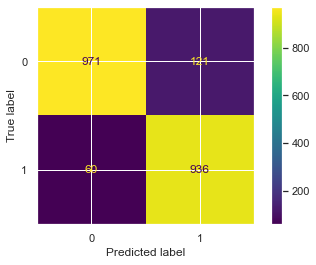

In [131]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_2test, rforest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [132]:
print(classification_report(y_2test, rforest_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1092
           1       0.89      0.94      0.91       996

    accuracy                           0.91      2088
   macro avg       0.91      0.91      0.91      2088
weighted avg       0.91      0.91      0.91      2088



In [133]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score' : [lr_as, dt_as, rf_as],
    'F1 Score' : [lr_f1, dt_f1, rf_f1]
})


models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy Score,F1 Score
2,Random Forest,0.913314,0.911836
1,Decision Tree,0.860153,0.857977
0,Logistic Regression,0.746648,0.749882


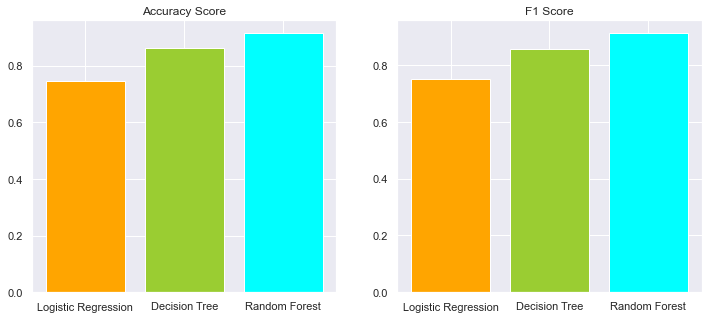

In [149]:
model = ['Logistic Regression', 'Decision Tree', 'Random Forest']
as2 = [lr_as, dt_as, rf_as]
fs2 = [lr_f1, dt_f1, rf_f1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(model, as2, color=['orange', 'yellowgreen', 'cyan'])
ax2.bar(model, fs2, color=['orange', 'yellowgreen', 'cyan'])

ax1.set(title='Accuracy Score')
ax2.set(title='F1 Score')

plt.show()

### *Đối với tập dữ liệu có 3 mức chất lượng*

### Logistic Regression (3)

In [150]:
#Khởi tạo model
logreg = LogisticRegression()

#fit với dữ liệu train
logreg.fit(X_3train, y_3train)

#Dự đoán dữ liệu test
logreg_pred = logreg.predict(X_3test)

#Accuracy Score
lr_as = accuracy_score(y_3test, logreg_pred)
print("Accuracy Score:", lr_as * 100)

#F1-Score
lr_f1 = f1_score(y_3test, logreg_pred, average='micro') 
print("F1 Score:", lr_f1 * 100)

Accuracy Score: 61.97687224669603
F1 Score: 61.97687224669603


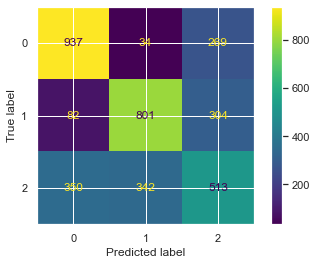

In [151]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_3test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [152]:
print(classification_report(y_3test, logreg_pred))

              precision    recall  f1-score   support

        High       0.68      0.76      0.72      1240
         Low       0.68      0.67      0.68      1187
      Medium       0.47      0.43      0.45      1205

    accuracy                           0.62      3632
   macro avg       0.61      0.62      0.61      3632
weighted avg       0.61      0.62      0.62      3632



### Decision Tree Classifier (3)

In [153]:
#Khởi tạo model
dtree = DecisionTreeClassifier()

#fit với dữ liệu train
dtree.fit(X_3train, y_3train)

#Dự đoán với dữ liệu
dtree_pred = dtree.predict(X_3test)

#Accuracy Score
dt_as = accuracy_score(dtree_pred, y_3test)
print("Accuracy Score:", dt_as * 100)

#F1 Score
dt_f1 = f1_score(dtree_pred, y_3test, average='micro')
print("F1 Score:", dt_f1 * 100)

Accuracy Score: 91.74008810572687
F1 Score: 91.74008810572687


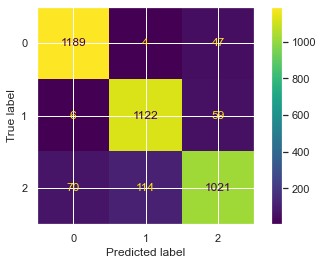

In [154]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_3test, dtree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [155]:
print(classification_report(y_3test, dtree_pred))

              precision    recall  f1-score   support

        High       0.94      0.96      0.95      1240
         Low       0.90      0.95      0.92      1187
      Medium       0.91      0.85      0.88      1205

    accuracy                           0.92      3632
   macro avg       0.92      0.92      0.92      3632
weighted avg       0.92      0.92      0.92      3632



### Random Forest Classifier (3)

In [156]:
#Khởi tạo model
rforest = RandomForestClassifier()

#fit với dữ liệu train
rforest.fit(X_3train, y_3train)

#Dự đoán với dữ liệu test
rforest_pred = rforest.predict(X_3test)

#Accuracy Score
rf_as = accuracy_score(rforest_pred, y_3test)
print("Accuracy Score:", rf_as * 100)

#F1 Score
rf_f1 = f1_score(rforest_pred, y_3test, average='micro')
print("F1 Score:", rf_f1 * 100)

Accuracy Score: 97.02643171806167
F1 Score: 97.02643171806167


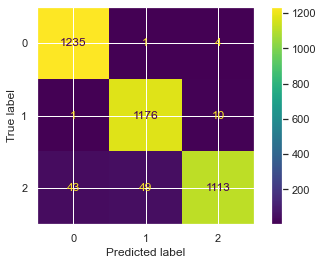

In [157]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_3test, rforest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [158]:
print(classification_report(y_3test, rforest_pred))

              precision    recall  f1-score   support

        High       0.97      1.00      0.98      1240
         Low       0.96      0.99      0.97      1187
      Medium       0.99      0.92      0.95      1205

    accuracy                           0.97      3632
   macro avg       0.97      0.97      0.97      3632
weighted avg       0.97      0.97      0.97      3632



In [159]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score' : [lr_as, dt_as, rf_as],
    'F1 Score' : [lr_f1, dt_f1, rf_f1]
})


models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy Score,F1 Score
2,Random Forest,0.970264,0.970264
1,Decision Tree,0.917401,0.917401
0,Logistic Regression,0.619769,0.619769


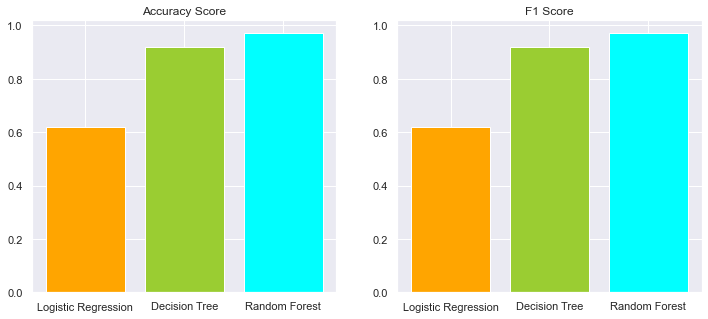

In [160]:
model = ['Logistic Regression', 'Decision Tree', 'Random Forest']
as2 = [lr_as, dt_as, rf_as]
fs2 = [lr_f1, dt_f1, rf_f1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(model, as2, color=['orange', 'yellowgreen', 'cyan'])
ax2.bar(model, fs2, color=['orange', 'yellowgreen', 'cyan'])

ax1.set(title='Accuracy Score')
ax2.set(title='F1 Score')

plt.show()

### *Đối với tập dữ liệu có 7 mức chất lượng*

### Logistic Regression (7)

In [161]:
#Khởi tạo model
logreg = LogisticRegression()

#fit với dữ liệu train
logreg.fit(X_7train, y_7train)

#Dự đoán dữ liệu test
logreg_pred = logreg.predict(X_7test)

#Accuracy Score
lr_as = accuracy_score(y_7test, logreg_pred)
print("Accuracy Score:", lr_as * 100)

#F1-Score
lr_f1 = f1_score(y_7test, logreg_pred, average='micro') 
print("F1 Score:", lr_f1 * 100)

Accuracy Score: 48.57718458826492
F1 Score: 48.57718458826492


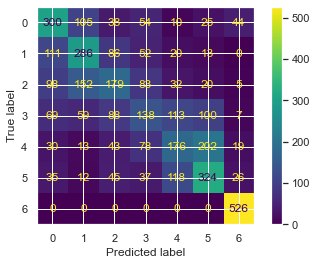

In [162]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_7test, logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [163]:
print(classification_report(y_7test, logreg_pred))

              precision    recall  f1-score   support

           3       0.47      0.52      0.49       576
           4       0.46      0.50      0.48       568
           5       0.37      0.31      0.34       569
           6       0.31      0.24      0.27       574
           7       0.38      0.31      0.34       561
           8       0.47      0.54      0.51       597
           9       0.84      1.00      0.91       526

    accuracy                           0.49      3971
   macro avg       0.47      0.49      0.48      3971
weighted avg       0.47      0.49      0.47      3971



### Decision Tree Classifier (7)

In [164]:
#Khởi tạo model
dtree = DecisionTreeClassifier()

#fit với dữ liệu train
dtree.fit(X_7train, y_7train)

#Dự đoán với dữ liệu
dtree_pred = dtree.predict(X_7test)

#Accuracy Score
dt_as = accuracy_score(dtree_pred, y_7test)
print("Accuracy Score:", dt_as * 100)

#F1 Score
dt_f1 = f1_score(dtree_pred, y_7test, average='micro')
print("F1 Score:", dt_f1 * 100)

Accuracy Score: 81.2641651976832
F1 Score: 81.2641651976832


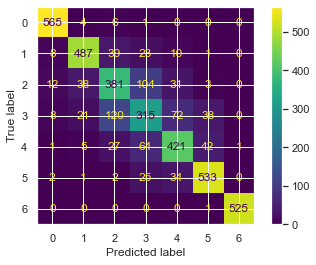

In [165]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_7test, dtree_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [166]:
print(classification_report(y_7test, dtree_pred))

              precision    recall  f1-score   support

           3       0.95      0.98      0.96       576
           4       0.88      0.86      0.87       568
           5       0.66      0.67      0.67       569
           6       0.59      0.55      0.57       574
           7       0.74      0.75      0.75       561
           8       0.86      0.89      0.88       597
           9       1.00      1.00      1.00       526

    accuracy                           0.81      3971
   macro avg       0.81      0.81      0.81      3971
weighted avg       0.81      0.81      0.81      3971



### Random Forest Classifier (7)

In [167]:
#Khởi tạo model
rforest = RandomForestClassifier()

#fit với dữ liệu train
rforest.fit(X_7train, y_7train)

#Dự đoán với dữ liệu test
rforest_pred = rforest.predict(X_7test)

#Accuracy Score
rf_as = accuracy_score(rforest_pred, y_7test)
print("Accuracy Score:", rf_as * 100)

#F1 Score
rf_f1 = f1_score(rforest_pred, y_7test, average='micro')
print("F1 Score:", rf_f1 * 100)

Accuracy Score: 88.26492067489298
F1 Score: 88.26492067489296


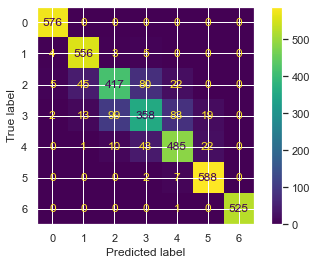

In [168]:
#Ma trận hỗn loạn
cm = confusion_matrix(y_7test, rforest_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= cm)
disp.plot()

In [169]:
print(classification_report(y_7test, rforest_pred))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       576
           4       0.90      0.98      0.94       568
           5       0.79      0.73      0.76       569
           6       0.73      0.62      0.67       574
           7       0.81      0.86      0.84       561
           8       0.93      0.98      0.96       597
           9       1.00      1.00      1.00       526

    accuracy                           0.88      3971
   macro avg       0.88      0.88      0.88      3971
weighted avg       0.88      0.88      0.88      3971



In [170]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy Score' : [lr_as, dt_as, rf_as],
    'F1 Score' : [lr_f1, dt_f1, rf_f1]
})


models.sort_values(by = 'F1 Score', ascending = False)

,Model,Accuracy Score,F1 Score
2,Random Forest,0.882649,0.882649
1,Decision Tree,0.812642,0.812642
0,Logistic Regression,0.485772,0.485772


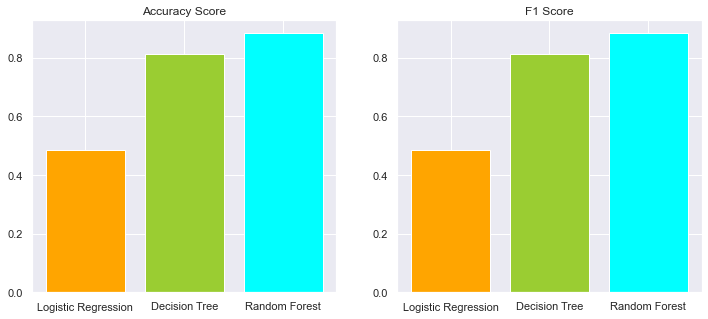

In [171]:
model = ['Logistic Regression', 'Decision Tree', 'Random Forest']
as2 = [lr_as, dt_as, rf_as]
fs2 = [lr_f1, dt_f1, rf_f1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(model, as2, color=['orange', 'yellowgreen', 'cyan'])
ax2.bar(model, fs2, color=['orange', 'yellowgreen', 'cyan'])

ax1.set(title='Accuracy Score')
ax2.set(title='F1 Score')

plt.show()